<a href="https://colab.research.google.com/github/GustavoDuregger/IntroducaoMachineLearningDataScience/blob/master/TensorFlow_(TF2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importações e instalações
!pip install tensorflow
import tensorflow as tf
tensorflow.__version__
import numpy as np

Text(0, 0.5, 'Custo')

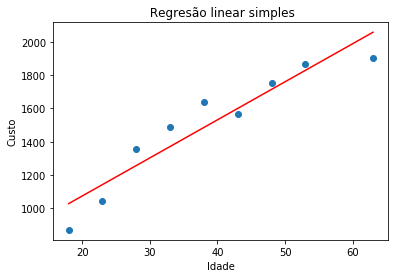

In [34]:
#Regressão linear com SKlearn
x= np.array([[18],[23],[28],[33],[38],[43],[48],[53],[63]])
y=np.array([[871],[1042],[1356],[1488],[1638],[1569],[1754],[1866],[1900]])
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)
#b0
regressor.intercept_
#b1
regressor.coef_
#previsao para uma pessoa de 40 anos
previsao1 = regressor.intercept_+regressor.coef_*40
previsao1
previsoes= regressor.predict(x)
previsoes
#Comparação do valor previsto para valor real
resultado = abs(y-previsoes).mean()
resultado
plt.plot(x, y, 'o')
plt.plot(x, previsoes, color='red')
plt.title(' Regresão linear simples')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [0]:
#Regressão linear com TensorFlow
from sklearn.preprocessing import StandardScaler
scaler_x= StandardScaler()
x=scaler_x.fit_transform(x)
scaler_y= StandardScaler()
y=scaler_y.fit_transform(y)

import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(0)
np.random.rand(2)

b0 = tf.Variable(0.001)
b1 = tf.Variable(0.001)

erro = tf.losses.mean_pairwise_squared_error(y, (b0 + b1 * x))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

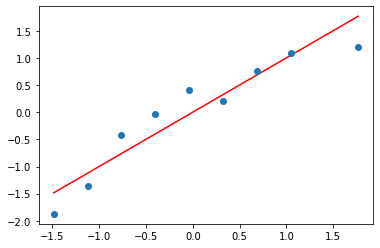

In [70]:
#Regressão linear com TensorFlow 2
with tf.Session() as sess:
  sess.run(init)
  for i in range(1000):
      sess.run(treinamento)
      
  b0_final, b1_final = sess.run([b0,b1])

  previsoes = b0_final + b1_final + x
  
  plt.plot(x, previsoes, color='red')
  plt.plot(x,y,'o')
  